<a href="https://www.kaggle.com/code/martaseidler/animation-movies-eda?scriptVersionId=161580011" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Load libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid",{"grid.color": ".6", "grid.linestyle": ":"})
sns.set_palette("Set2")

In [2]:
df = pd.read_csv('/kaggle/input/52000-animation-movie-details-dataset-2024/Animation_Movies.csv')

## A quick look at the Data

In [3]:
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,150540,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,/j29ekbcLpBvxnGk6LjdTc2EI5SA.jpg,...,en,Inside Out,"Growing up can be a bumpy road, and it's no ex...",107.292,/2H1TmgdfNtsKlU9jKdeNyYL5y8T.jpg,Meet the little voices inside your head.,"Animation, Family, Adventure, Drama, Comedy","Pixar, Walt Disney Pictures",United States of America,English
1,14160,Up,7.949,18857,Released,2009-05-28,735099082,96,False,/hGGC9gKo7CFE3fW07RA587e5kol.jpg,...,en,Up,Carl Fredricksen spent his entire life dreamin...,90.968,/vpbaStTMt8qqXaEgnOR2EE4DNJk.jpg,The greatest adventure is just getting back home.,"Animation, Comedy, Family, Adventure",Pixar,United States of America,English
2,12,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,False,/h3uqFk7sZRJvLZDdLiFB9qwbL07.jpg,...,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",55.456,/ggQ6o8X5984OCh3kZi2UIJQJY5y.jpg,There are 3.7 trillion fish in the ocean. They...,"Animation, Family",Pixar,United States of America,English
3,354912,Coco,8.222,17742,Released,2017-10-27,800526015,105,False,/askg3SMvhqEl4OL52YuvdtY40Yb.jpg,...,en,Coco,Despite his family’s baffling generations-old ...,166.578,/gGEsBPAijhVUFoiNpgZXqRVWJt2.jpg,The celebration of a lifetime,"Family, Animation, Fantasy, Music, Comedy, Adv...","Pixar, Walt Disney Pictures",United States of America,"English, Spanish"
4,10681,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,False,/fK5ssgvtI43z19FoWigdlqgpLRE.jpg,...,en,WALL·E,What if mankind had to leave Earth and somebod...,58.517,/hbhFnRzzg6ZDmm8YAmxBnQpQIPh.jpg,After 700 years of doing what he was built for...,"Animation, Family, Science Fiction","Pixar, Walt Disney Pictures",United States of America,English


In [4]:
df.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,5.194500e+04,51945.000000,51945.000000,5.194500e+04,51945.000000,5.194500e+04,51945.000000
mean,6.188122e+05,2.597083,40.395380,1.863464e+06,20.901415,5.759513e+05,1.886233
std,3.479748e+05,3.318748,482.705948,3.049824e+07,39.016002,7.606628e+06,9.700913
min,1.200000e+01,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,3.300810e+05,0.000000,0.000000,0.000000e+00,3.000000,0.000000e+00,0.600000
50%,6.119150e+05,0.000000,0.000000,0.000000e+00,7.000000,0.000000e+00,0.600000
75%,9.159040e+05,6.000000,2.000000,0.000000e+00,19.000000,0.000000e+00,0.882000
max,1.238314e+06,10.000000,19463.000000,1.450027e+09,3720.000000,2.600000e+08,1008.942000


In [5]:
df.describe(include='object')

,title,status,release_date,backdrop_path,homepage,imdb_id,original_language,original_title,overview,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
count,51944,51945,49808,15835,8253,29552,51945,51944,45866,37934,4678,51945,29398,39700,33818
unique,49381,6,16893,15731,7461,29545,102,50318,44907,37819,4451,2649,11196,1096,617
top,Little Red Riding Hood,Released,2017-01-01,/7tFOLDhZqKPactVlGfdjgVmYnlu.jpg,https://animation.geidai.ac.jp,tt27048168,en,Metamorphosis,An Aesop’s Film Fables cartoon.,/tVRb7CCGuru9RdG1ikGFCceuegy.jpg,animation short,Animation,ONF | NFB,United States of America,English
freq,15,51134,291,17,147,2,28584,9,71,12,104,28393,717,12836,12005


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51945 entries, 0 to 51944
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    51945 non-null  int64  
 1   title                 51944 non-null  object 
 2   vote_average          51945 non-null  float64
 3   vote_count            51945 non-null  int64  
 4   status                51945 non-null  object 
 5   release_date          49808 non-null  object 
 6   revenue               51945 non-null  int64  
 7   runtime               51945 non-null  int64  
 8   adult                 51945 non-null  bool   
 9   backdrop_path         15835 non-null  object 
 10  budget                51945 non-null  int64  
 11  homepage              8253 non-null   object 
 12  imdb_id               29552 non-null  object 
 13  original_language     51945 non-null  object 
 14  original_title        51944 non-null  object 
 15  overview           

In [7]:
df.drop(['backdrop_path', 'poster_path', 'id', 'overview', 'homepage', 'tagline', 'imdb_id'], axis=1, inplace=True)

In [8]:
df.head()

,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,genres,production_companies,production_countries,spoken_languages
0,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,175000000,en,Inside Out,107.292,"Animation, Family, Adventure, Drama, Comedy","Pixar, Walt Disney Pictures",United States of America,English
1,Up,7.949,18857,Released,2009-05-28,735099082,96,False,175000000,en,Up,90.968,"Animation, Comedy, Family, Adventure",Pixar,United States of America,English
2,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,False,94000000,en,Finding Nemo,55.456,"Animation, Family",Pixar,United States of America,English
3,Coco,8.222,17742,Released,2017-10-27,800526015,105,False,175000000,en,Coco,166.578,"Family, Animation, Fantasy, Music, Comedy, Adv...","Pixar, Walt Disney Pictures",United States of America,"English, Spanish"
4,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,False,180000000,en,WALL·E,58.517,"Animation, Family, Science Fiction","Pixar, Walt Disney Pictures",United States of America,English


In [9]:
df.loc[df.duplicated()]

,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,genres,production_companies,production_countries,spoken_languages
26479,Entre Elle & Lui - 11 A la fin du 1er trimestre,0.0,0,Released,NaN,0,0,False,0,fr,Entre Elle & Lui - 11 A la fin du 1er trimestre,0.6,Animation,NaN,NaN,NaN
29741,Haïku,0.0,0,Released,2001-01-01,0,1,False,0,en,Haïku,0.6,Animation,NaN,Belgium,No Language
45068,The Head Saves The Earth,0.0,0,Released,1995-09-12,0,110,False,0,en,The Head Saves The Earth,0.6,"Science Fiction, Comedy, Animation","MTV Animation, Fogelmania Productions",NaN,NaN


In [10]:
df.drop([26479, 29741, 45068], inplace=True)

In [11]:
df.loc[df.duplicated()]

,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,genres,production_companies,production_countries,spoken_languages


In [12]:
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d')

[Split genres from @fathyalin notebook:](https://www.kaggle.com/code/fathyalin/animation-movies-eda?scriptVersionId=161215576&cellId=17)

In [13]:
genre = {}
for row in df["genres"].str.split(","):
    for word in row:
        word = word.strip()
        if word in genre:
            genre[word] += 1
        else:
            genre[word] = 1
genres_df = pd.DataFrame.from_dict([genre]).T.sort_values(by=0, ascending=False).head(10)

In [14]:
genres_df.drop('Animation', inplace=True)

In [15]:
genres_df

,0
Comedy,7878
Family,7480
Fantasy,3896
Adventure,3539
Drama,2849
Science Fiction,2539
Action,2428
Documentary,1897
Music,1697


## Data Visualization

In [16]:
grouped_orig_lang = df.groupby('original_language').size().sort_values(ascending=False).head(10)
grouped_orig_lang

original_language
en    28582
ja     5330
fr     2997
ru     2871
es     1472
de     1266
xx     1011
zh     1000
pt      947
pl      759
dtype: int64

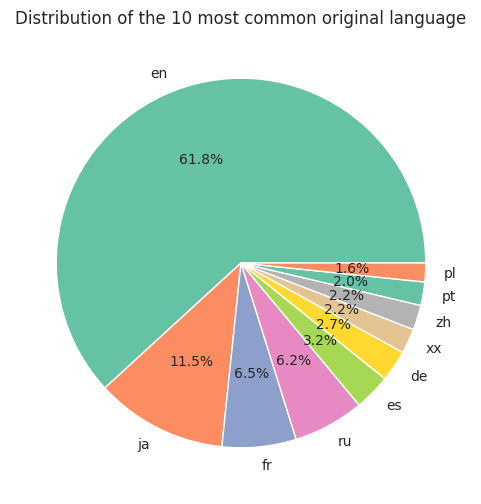

In [17]:
plt.figure(figsize=(6,6))
plt.title("Distribution of the 10 most common original language")
plt.pie(grouped_orig_lang, labels=grouped_orig_lang.index, autopct='%1.1f%%')
plt.show()

In [18]:
grouped_prod_countr = df.groupby('production_countries').size().sort_values(ascending=False).head(10)
grouped_prod_countr

production_countries
United States of America    12836
Japan                        5182
France                       2136
United Kingdom               1854
Canada                       1616
Soviet Union                 1556
Germany                       980
Russia                        828
Poland                        711
China                         628
dtype: int64

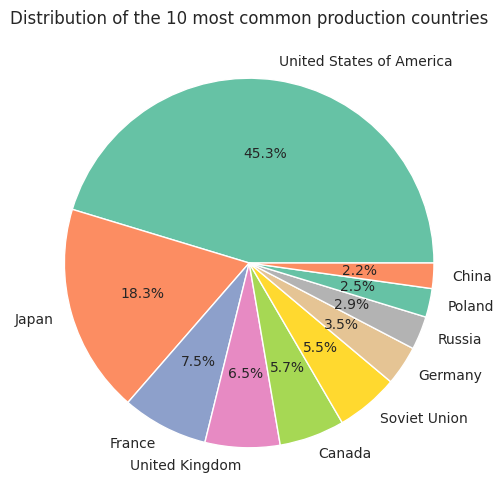

In [19]:
plt.figure(figsize=(6,6))
plt.title("Distribution of the 10 most common production countries")
plt.pie(grouped_prod_countr, labels=grouped_prod_countr.index, autopct='%1.1f%%')
plt.show()

In [20]:
grouped_prod_comp = df.groupby('production_companies').size().sort_values(ascending=False).head(10)
grouped_prod_comp

production_companies
ONF | NFB                       717
Soyuzmultfilm                   657
Walt Disney Productions         555
Walter Lantz Productions        511
Fleischer Studios               399
Tokyo University of the Arts    339
Famous Studios                  335
Terrytoons                      287
Kyivnaukfilm                    274
DePatie-Freleng Enterprises     272
dtype: int64

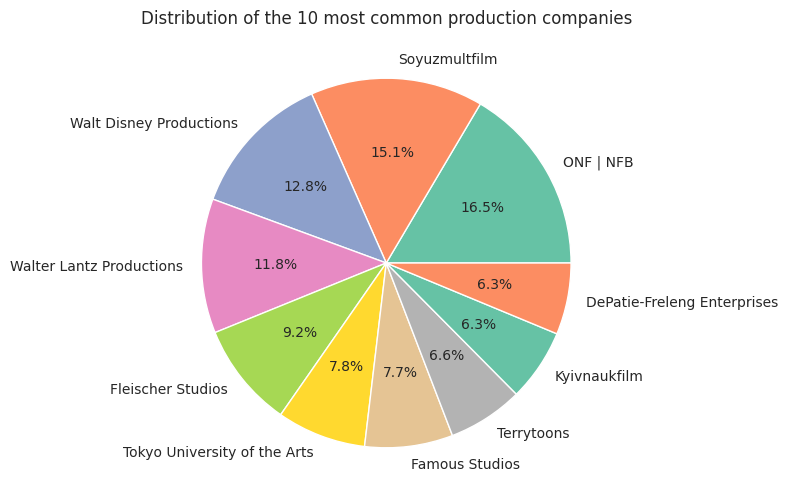

In [21]:
plt.figure(figsize=(6,6))
plt.title("Distribution of the 10 most common production companies")
plt.pie(grouped_prod_comp, labels=grouped_prod_comp.index, autopct='%1.1f%%')
plt.show()

In [22]:
highest_grossing_movies = df[['title', 'revenue']].sort_values(by='revenue', ascending=False).head(15)
#highest_grossing_movies

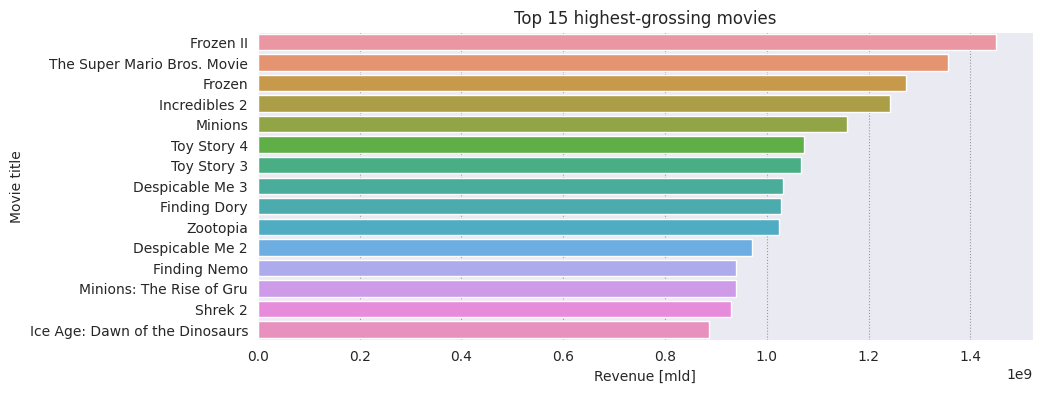

In [23]:
plt.figure(figsize=(10, 4))
plt.title("Top 15 highest-grossing movies")
sns.barplot(data=highest_grossing_movies, y='title', x='revenue', orient='h')
plt.xlabel('Revenue [mld]')
plt.ylabel("Movie title")
plt.show()

In [24]:
highest_budget_movies = df[['title', 'budget']].sort_values(by='budget', ascending=False).head(15)
#highest_budget_movies

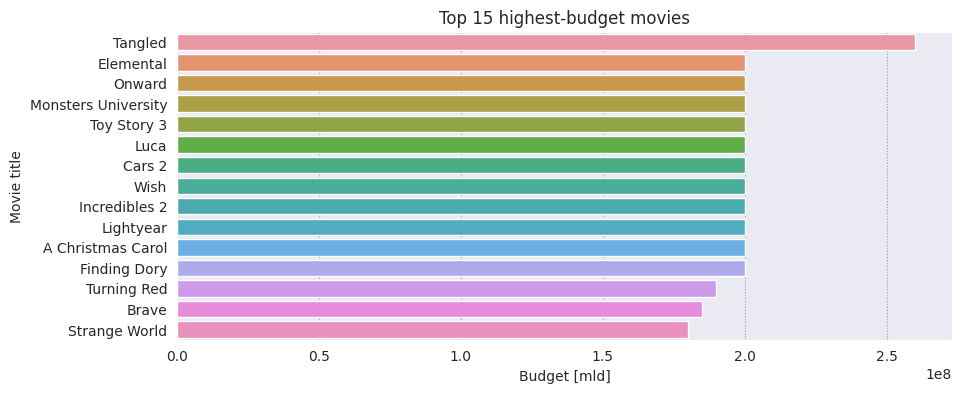

In [25]:
plt.figure(figsize=(10, 4))
plt.title("Top 15 highest-budget movies")
sns.barplot(data=highest_budget_movies, y='title', x='budget', orient='h')
plt.xlabel('Budget [mld]')
plt.ylabel("Movie title")
plt.show()

In [26]:
longest_movies = df[['title', 'runtime']].sort_values(by='runtime', ascending=False).head(15)
#longest_movies

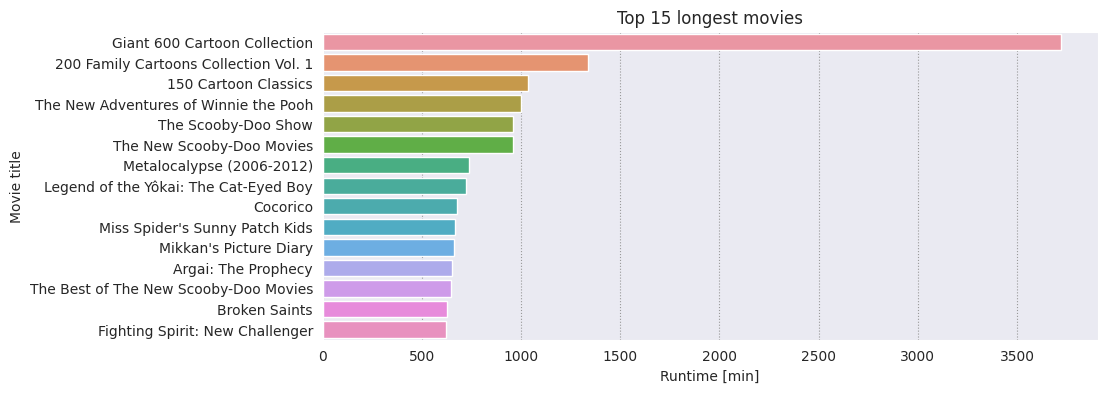

In [27]:
plt.figure(figsize=(10, 4))
plt.title("Top 15 longest movies")
sns.barplot(data=longest_movies, y='title', x='runtime', orient='h')
plt.xlabel('Runtime [min]')
plt.ylabel("Movie title")
plt.show()

In [28]:
most_popular_movies = df[['title', 'popularity']].sort_values(by='popularity', ascending=False).head(15)
#most_popular_movies

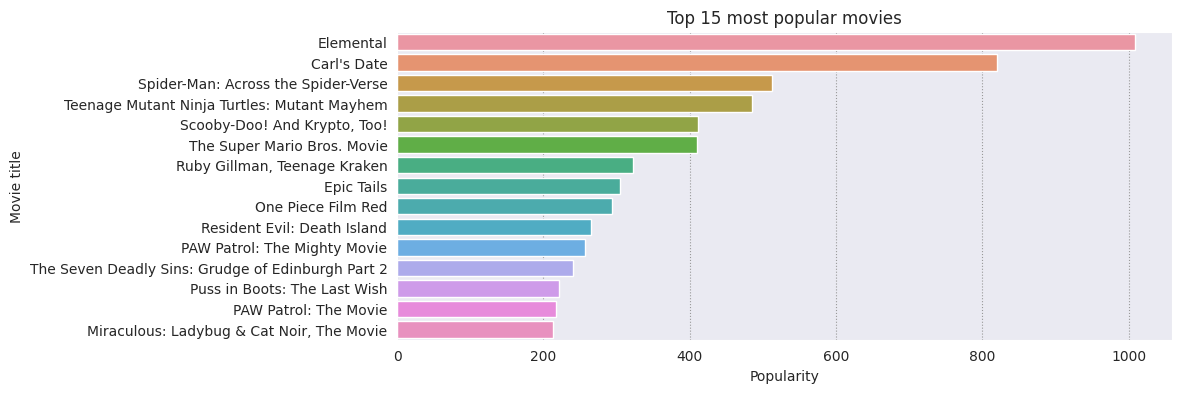

In [29]:
plt.figure(figsize=(10, 4))
plt.title("Top 15 most popular movies")
sns.barplot(data=most_popular_movies, y='title', x='popularity', orient='h')
plt.xlabel('Popularity')
plt.ylabel("Movie title")
plt.show()

In [30]:
release_year_group = df.groupby(df.release_date.dt.year)['title'].count()
#release_year_group

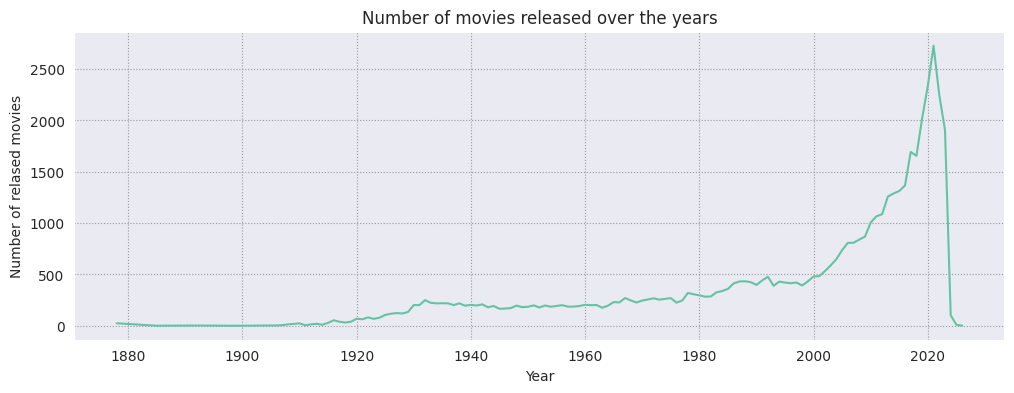

In [31]:
plt.figure(figsize=(12,4))
release_year_group.plot()
plt.title("Number of movies released over the years")
plt.ylabel("Number of relased movies")
plt.xlabel("Year")
plt.show()

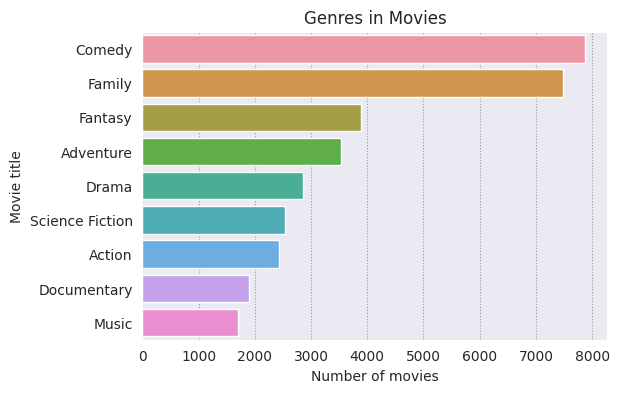

In [32]:
plt.figure(figsize=(6,4))
plt.title("Genres in Movies")
sns.barplot(data=genres_df, y=genres_df.index, x=0, orient='h')
plt.xlabel('Number of movies')
plt.ylabel('Movie title')
plt.show()